In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:

class pawn():

    def __init__(self, verbose = True):

        self.coord = [2, 2]
        self.verb = verbose

        return
    
    def __get_move(self, t):
        
        if (t[0] == 0) and (t[1] == 0):
            move = 'up'
        if (t[0] == 0) and (t[1] == 1):
            move =  'right'
        if (t[0] == 1) and (t[1] == 0):
            move = 'down'
        if (t[0] == 1) and (t[1] == 1):
            move = 'left'

        return move

        

    def __coin_toss(self):
    
        coin = ('head', 'tail')
        
        t = np.random.randint(2, size = 2)
    
        move = self.__get_move(t)
        if move == 'up':
            self.coord[0] += 1
        if move == 'down':
            self.coord[0] -= 1
        if move == 'right':
            self.coord[1] += 1
        if move == 'left':
            self.coord[1] -= 1

        if self.verb == True:
            print('Tossed: {}, {} -- moving {}'.format(coin[t[0]], coin[t[1]], move))
        
        return move

    def __check_position(self):

        on_grid = True
        
        xx = self.coord[0]
        yy = self.coord[1]

        if xx > 4 or xx < 0:
            if self.verb == True:
                print('The pawn went out of the grid!')
                print(self.coord)
            on_grid = False
        if yy > 4 or yy < 0:
            if self.verb == True:   
                print('The pawn went out of the grid!')
                print(self.coord)
            on_grid = False
            
        return on_grid


    def reset_coords(self):

        self.coord = [2,2]
        return


    def play_game(self):

        moves = []
        
        for round in range(1,100):

            if self.verb == True:
                print('Toss #{}'.format(round))
            move = self.__coin_toss()
            moves.append(move)
            on_grid = self.__check_position()
            if on_grid == False:
                if self.verb == False:
                    print('Game ended')
                    print(f'# of tosses: {round}')
                self.reset_coords()
                return round, moves
        
        print('Exceded 100 rounds!')
        return

        

In [4]:
all_games_tosses = []
all_games_moves = []

number_of_games = 1000

for n in range(1, number_of_games+1):

    p = pawn(verbose = False)
    rounds, moves = p.play_game()
    all_games_tosses.append(rounds)
    all_games_moves.append(moves)
    print(moves)
    
    fig, ax = plt.subplots()
    
    ax.grid(True, linestyle = '--', c = 'gray', alpha = 0.5, axis = 'y')
    ax.hist(moves, color = 'indianred', edgecolor = 'k')
    
    ax.tick_params(which = 'both', direction = 'in', right = True, bottom = False)
    ax.set_ylabel('# occurrences', fontsize = 16)
    ax.set_title('Game {}'.format(n), fontsize = 20)

    # option to not show plots
    plt.ioff()
    
    #fig.savefig('./coin_plots/Game_{}.png'.format(n), facecolor = 'white', transparent = False)
    plt.close()

;

Game ended
# of tosses: 8
['down', 'right', 'right', 'left', 'down', 'up', 'right', 'right']
Game ended
# of tosses: 5
['right', 'right', 'down', 'down', 'down']
Game ended
# of tosses: 12
['up', 'up', 'down', 'left', 'down', 'down', 'down', 'up', 'left', 'right', 'left', 'left']
Game ended
# of tosses: 17
['left', 'down', 'up', 'down', 'right', 'left', 'left', 'up', 'right', 'right', 'up', 'left', 'down', 'down', 'left', 'down', 'left']
Game ended
# of tosses: 5
['right', 'up', 'up', 'right', 'up']
Game ended
# of tosses: 7
['up', 'right', 'up', 'left', 'right', 'left', 'up']
Game ended
# of tosses: 12
['up', 'up', 'left', 'down', 'left', 'down', 'right', 'up', 'right', 'left', 'up', 'up']
Game ended
# of tosses: 6
['down', 'up', 'up', 'right', 'right', 'right']
Game ended
# of tosses: 15
['left', 'right', 'right', 'up', 'down', 'up', 'left', 'up', 'down', 'down', 'down', 'right', 'right', 'down', 'down']
Game ended
# of tosses: 16
['down', 'right', 'up', 'left', 'up', 'down', 'down',

''

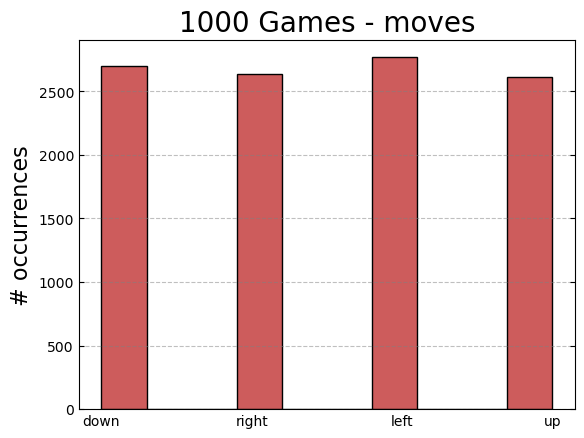

In [5]:
#total Games plots -- moves
all_games_moves = [item for sublist in all_games_moves for item in sublist]

fig, ax = plt.subplots()

ax.grid(True, linestyle = '--', c = 'gray', alpha = 0.5, axis = 'y')
ax.hist(all_games_moves, color = 'indianred', edgecolor = 'k')

ax.tick_params(which = 'both', direction = 'in', right = True, bottom = False)
ax.set_ylabel('# occurrences', fontsize = 16)
ax.set_title('1000 Games - moves'.format(n), fontsize = 20)

plt.show()
fig.savefig('./coin_plots/all_games_moves_1kgames.png'.format(n), facecolor = 'white', transparent = False)
plt.close()


Average number of tosses: 10.716


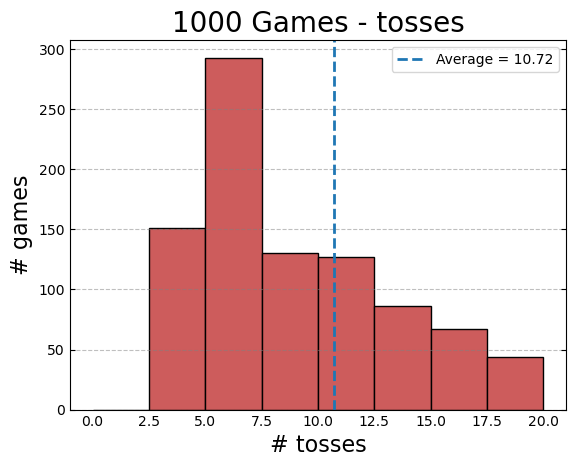

In [6]:
# AVERAGE
avg_tosses = np.average(all_games_tosses)
print('Average number of tosses: {}'.format(avg_tosses))

fig, ax = plt.subplots()

bins = np.arange(0, 20.5, 2.5)

ax.grid(True, linestyle = '--', c = 'gray', alpha = 0.5, axis = 'y')
ax.hist(all_games_tosses, bins = bins, color = 'indianred', edgecolor = 'k')
ax.axvline(avg_tosses, linewidth = 2, ls = '--',
           label = 'Average = {:.2f}'.format(avg_tosses))

ax.legend()
ax.tick_params(which = 'both', direction = 'in', right = True, bottom = False)
ax.set_ylabel('# games', fontsize = 16)
ax.set_xlabel('# tosses', fontsize = 16)
ax.set_title('1000 Games - tosses'.format(n), fontsize = 20)

plt.show()
fig.savefig('./coin_plots/all_games_tosses_1kgames.png'.format(n), facecolor = 'white', transparent = False)
plt.close()